# Ecuación de Helmholtz

La ecuación vectorial de Helmholtz aparece en varias áreas de la física, la mayoria de la veces se encuentra relacionada con la propagación de una onda, ya sea electromagnetica o elastica, la forma general de la ecuacuón es la siguiente:

\begin{equation*}
\nabla^2 \psi+ k^2\psi=0
\end{equation*}

donde el operador $\nabla^2$, es el laplaciano, esta función puede ser usado en cualquier sistema de coordenadas, la más usual es usar la ecuación en coordenadas esfericas, esto por su relación con las ondas. En ese tipo de casos, la ecuación a de Helmholtz toma la siguiente forma:

\begin{equation*}
\left[\frac{1}{r^2}\frac{\partial}{\partial{r}}\left(r^2\frac{\partial}{\partial{r}} \right) +\frac{1}{r^2sin(\theta)} \frac{\partial}{\partial \theta}\left(sin(\theta)\frac{\partial}{\partial \theta} \right) + \frac{1}{r^2sin^2(\theta)} \left(\frac{\partial^2}{\partial^2 \varphi} \right)\right] \psi + k^2 \psi =0
\end{equation*}

Si se supone que la ecuación $\psi$ puede ser escriba como una multiplicación de funciones (método de funciones separables), tal que:

\begin{equation*}
\psi(r,\theta,\varphi) = R(r) Y(\theta,\varphi)
\end{equation*}

entonces, la ecuación de Helmholtz puede ser escrita como dos ecuaciones diferenciales de la siguiente manera:

\begin{equation*}
\left[\frac{1}{sin(\theta)} \frac{\partial}{\partial \theta} \left(sin(\theta) \frac{\partial }{\partial \theta} \right) +\frac{1}{sin^2\theta} \frac{\partial^2}{\partial \varphi^2} + l(l+1) \right] Y(\theta,\varphi) = 0
\end{equation*}

\begin{equation*}
\left[\frac{d}{dr} \left(r^2 \frac{d}{dr} \right) -l (l+1)\right] R(r) =0
\end{equation*}

Para de la función $Y(\theta,\varphi)$, se conoce su solución, la cual es conocida como armónicos esféricos. La función $Y(\theta,\varphi)$ tiene dada en términos de funciones trigonometricas y polinomios de Legendre de la siguiente manera:

\begin{equation*}
Y^m_l(\theta,\varphi) = A^m_l P^m_l(cos\theta)e^{im\varphi} \, \, \, \, \, 
\text{donde} \, \, \, \, \,  A^m_l=\sqrt{\frac{(2l+1)}{4\pi}\frac{(l-m)!}{(l+m)!}}
\end{equation*}

Para la parte radial, la solución viene dada a partir de suponer que la función se pude escribir como una serie de potencias tal que $a_\alpha r^\alpha$, por lo que la solución tiene la siguiente forma:

\begin{equation*}
R(r)= A_{lm}r^l + \frac{B_{lm}}{r^{l+1}}
\end{equation*}

En este notebook nos concentraremos en el caso donde existe una simetria rotacional, esto quiere decir que la unica variable sera $r$, por lo tanto la ecuación diferencial a resolver es la parte radial que tendra la siguiente forma:

\begin{equation*}
\left[\frac{\partial^2}{\partial r^2}+\frac{2}{r}\frac{\partial}{\partial r} + k^2 \right] \psi = 0
\end{equation*}


In [3]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

In [40]:
class wave:
  """
  Clase que contiene los algoritmos para resolver la ecuación de Helmoltz
  a partir de los parámetros
  """
  def __init__(self, min, max, size, y0):
    """
    Parámetros de la onda para obtener su solucion
    Definición de variables
    Dominio de la funcion (0,\infty)
    min  ----> valor minimo de los valores de r 
    max  ----> valor máximo de los valores de r
    size ----> numero de celdas a lo largo y ancho para 
               generae una matriz de sizeXsize
    y0   ----> Valores iniciales de la posicion y la velocidad respectivamente
    """
    self.min = min
    self.max = max
    self.size = size
    self.y0 = y0
    self.initialize_system()

  def initialize_system(self):
    """
    A partir de los valores maximos y minimos genera una
    serie de valores para la variable r y genera un mapa con los valores
    en cada celda
    """
    self.r = np.sqrt(2)*np.linspace(self.min, self.max, self.size)
    self.map = np.zeros((2*self.size, 2*self.size))

  def solve_PDE(self, df):
    """
    Funcion que resuelve la ecuación diferencial y asigna a cada valor
    de la celda su correspondiente solución
    """
    sol = odeint(df, self.y0, self.r)
    self.solution = sol[:, 0]
    self.fill_map()

  def fill_map(self):
    """
    Algoritmo para asignar el valor de la solucion en sus celdas correspondientes
    haciendo uso de la simetria radial, como princpical cuadrante de llenado es 
    I, los demás cuadrantes se les asigna su valor por medio de simetrias
    """
    for i in range(self.size):
        pos_i = self.pos_values(i)
        for j in range(self.size):
            pos_j = self.pos_values(j)
            self.fill_pos(pos_i, pos_j, i, j)

  def pos_values(self, pos):
    """
    Valores donde se encuentran las simetrias 
    """
    return [self.size-pos, self.size+pos]

  def fill_pos(self, pos_i, pos_j, i, j):
    """
    Funcion para asignar el valor a cada mapa haciedno uso de la simetria 
    """
    for ii in pos_i:
        for jj in pos_j:
            r_ij = (self.r[i]**2+self.r[j]**2)**(1/2)
            self.map[ii, jj] = self.fill_values(r_ij)

  def fill_values(self, r_ij):
    """
    Algoritmo para encontrar que valor le corresponde a cada celda
    """
    istrue = True
    n = 0
    value = 0
    while istrue and n < self.size:
        if r_ij-self.r[n] <= 0.001:
            value = self.solution[n]
            istrue = False
        else:
            n += 1
    return value

  def plot_graphics(self):
    """
    Funcion para graficar la funcion radial y creacion del mapa de colores
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax2.axis("off")
    contour = ax2.contourf(self.map, cmap="inferno_r")
    ax1.plot(self.r, self.solution)
    fig.colorbar(contour)
    plt.show()

In [74]:
def df(y, x, k=0.25, v=0):
  """
  Ecuación de Helmholtz
  """
  y1, y2 = y[0], y[1]
  dy1 = y2
  if 30 < x < 40:
      dy2 = -10
  else:
      dy2 = -2*y2/x-k**2*y1-v*y2
  return [dy1, dy2]

In [75]:
parameters = {
    "size": 100,
    "y0": [0, 1],
    "minimum": 0.01,
    "maximum": 100 }

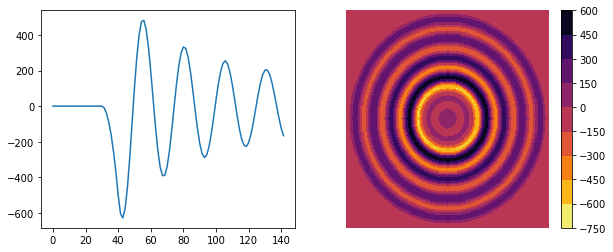

In [76]:
# Inicialización del sistema
wave_solution = wave(parameters["minimum"],
                     parameters["maximum"],
                     parameters["size"],
                     parameters["y0"])
# Resuelve la ecuación diferencial con los parámetros asignados
wave_solution.solve_PDE(df)
# Grafica de la solución
wave_solution.plot_graphics()

Referencias:

+ Romero, J. M. (2011). Funciones especiales con aplicaciones a la Mecanica Cuantica y al Electromagnetismo. http://arxiv.org/abs/1103.2387

+ Garc, B. (2006). Fundamentoss de Electromagnetismo: Iniciación al Cálculo Numérico en Electromagnetismo. http://maxwell.ugr.es/bgarcia/Fundamentos-em.pdf

### Extra: Armónicos essféricos

In [77]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy as sci
import numpy as np
import matplotlib

In [91]:
def plot_spherical_harmonics(l, m):
    phi, theta = np.mgrid[0:2 * np.pi:200j,
                          0:np.pi:100j]  #arrays de variables angulares
    R = np.abs(sp.sph_harm(m, l, phi,
                           theta))  #Array de valores absolutos de Ymn
    #A continuación convertimos a coordenadas cartesianas
    # para su representación 3D
    X = R * np.sin(theta) * np.cos(phi)
    Y = R * np.sin(theta) * np.sin(phi)
    Z = R * np.cos(theta)
    N = R / R.max(
    )  # Normalizar R para que los colores del plot cubran todo el rango del colormap.
    fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(12, 10))
    im = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(N))
    ax.set_title(r'$|Y^{}_{}|$'.format(m, l), fontsize=20)
    m = cm.ScalarMappable(cmap=cm.jet)
    m.set_array(R)  # Asignamos al mappable el array de datos sin normalizar,
    #para que la escala corresponda a los valores de R
    fig.colorbar(m, shrink=0.8)

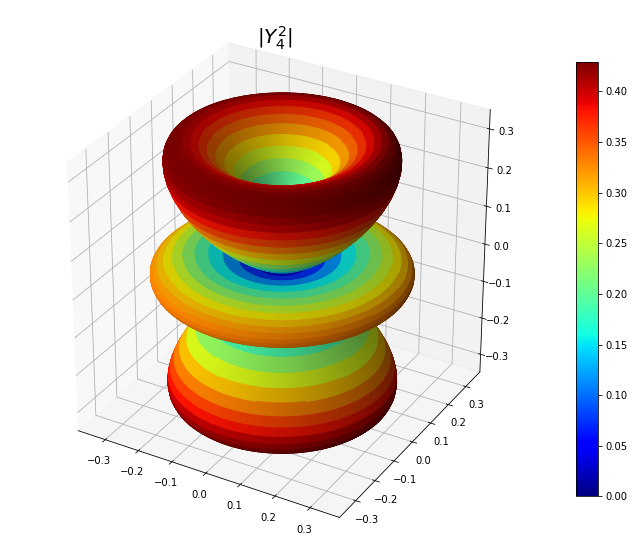

In [92]:
inputs = {
    "l": 4,
    "m": 2,
}
plot_spherical_harmonics(
    inputs["l"],
    inputs["m"],
)